<a href="https://colab.research.google.com/github/leahpattison/atmosphericWaterCollector/blob/master/size3/Time%20Series%20Analysis%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis

## To begin with...

### Import Required Packages

In [1]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
## General packages for working with vectors, datasets, and visualization
import numpy as np
from numpy.random import normal, seed
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight') # This is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

## Packages for analyzing time series
## Packages for analyzing time series
!pip install --upgrade Cython
!pip install --upgrade git+https://github.com/statsmodels/statsmodels
import statsmodels.api as sm
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
import seaborn as sns
## The path where we have datasets

!git clone https://github.com/leahpattison/atmosphericWaterCollector.git
  

Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (0.29.7)
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-lg1fclo3
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-lg1fclo3
  Stored in directory: /tmp/pip-ephem-wheel-cache-kowzdh6j/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.9.0
    Uninstalling statsmodels-0.9.0:
      Successfully uninstalled statsmodels-0.9.0
Cloning into 'atmosphericWaterCollector'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 337 (delta 2), reused 0 (delta 0), pack-reused 325
Receiving objects: 100% (337/337), 24.19 MiB | 21.25 MiB/s, done.
Resolving deltas: 100% (154/154), done.


## RUN TO PULL FROM GIT 

In [2]:

!git -C "./atmosphericWaterCollector" pull

Already up to date.


In [3]:
print(os.listdir("./atmosphericWaterCollector/size3/input"))


['failed 2.txt', 'failed 3.txt', 'exp2.csv', 'exp1.csv', 'failed.txt']


#### Reading data

Resample to every 3 minutes - use mean sampling 

In [0]:
# Open all data for size_0 data set 

df1 = pd.read_csv('./atmosphericWaterCollector/size3/input/exp1.csv',  header = None, names = ["time", "humidity", "temperature", "mass"])
df1["time"] = pd.to_datetime(df1["time"], unit='s')
df1 = df1.set_index(pd.DatetimeIndex(df1["time"]))
del df1["time"]
#df1 = df1.resample('3T').mean()

df2 = pd.read_csv('./atmosphericWaterCollector/size3/input/exp2.csv',  header = None, names = ["time", "humidity", "temperature", "mass"])
df2["time"] = pd.to_datetime(df2["time"], unit='s')
df2 = df2.set_index(pd.DatetimeIndex(df2["time"]))
del df2["time"]
#df2 = df2.resample('2T').mean()

Graphing function to format graphs from this point

In [0]:
## Graphing function 
def newfigure(*args, **kwargs):
    fig, ax = plt.subplots(*args, **kwargs)
    for i, a in enumerate(fig.axes):
        a.tick_params(direction='in', grid_linestyle=":", top=True, right=True)
        a.grid(which='major', axis='both', linestyle=":")
    return fig, ax

Plot all data for both data sets; use the Hodrick prescott filter to show the trend of data for mass

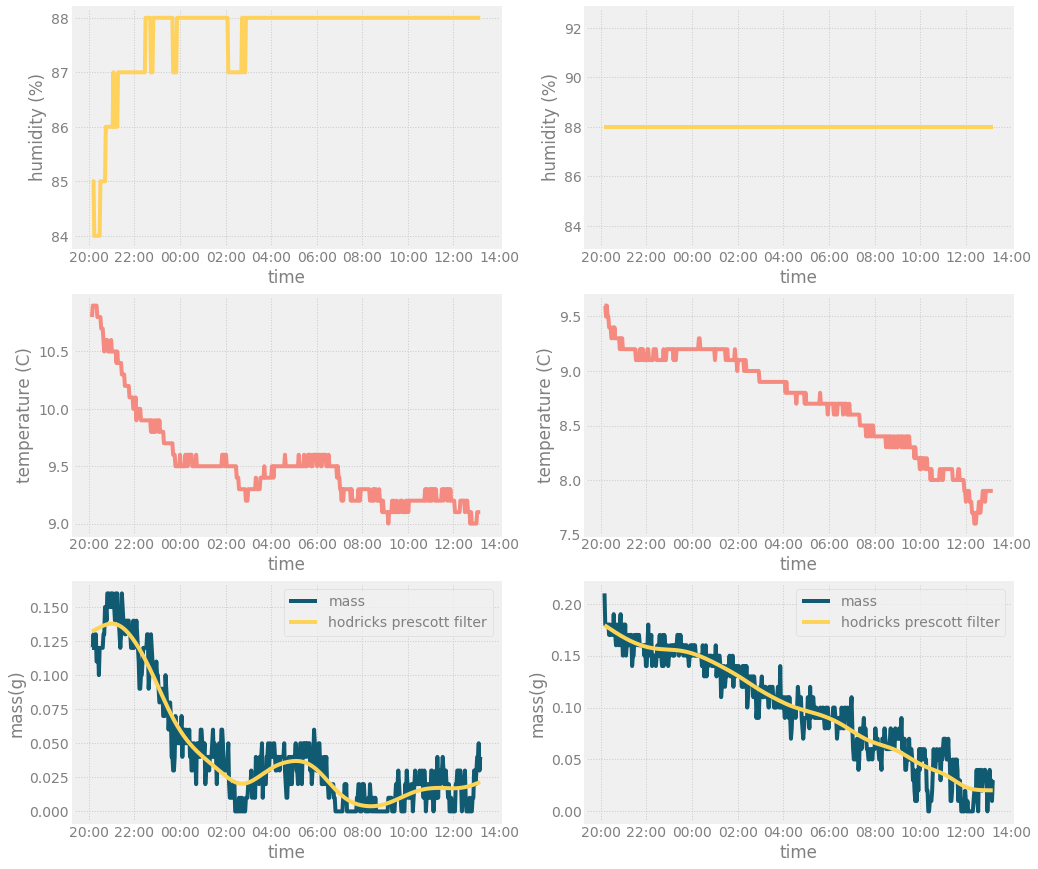

In [16]:
#Use Hodrick prescott filter to find the trend 
hp_cycle1, hp_trend1 = sm.tsa.filters.hpfilter(df1["mass"], lamb=129600)
hp_cycle2, hp_trend2 = sm.tsa.filters.hpfilter(df2["mass"], lamb=129600)


fig, ax = newfigure(nrows =3, ncols=2)

xformatter = mdates.DateFormatter('%H:%M')

t = [df1, df2]

for i in range(len(t)):
    ax[0, i].set_ylabel("humidity (%)")
    ax[1, i].set_ylabel("temperature (C)")
    ax[2, i].set_ylabel("mass(g)")

    for num, name in enumerate(t[i].columns):
        c = ['#FFD25E', '#F58A80','#115b72','#fed456']
        ax[num, i].plot(t[i][name], color = c[num])
        ax[num, i].xaxis.set_major_formatter(xformatter)
        ax[num, i].set_xlabel("time")

        
ax[2, 0].plot(hp_trend1, label = 'hodricks prescott filter', color=c[3])
ax[2, 1].plot(hp_trend2, label = 'hodricks prescott filter', color=c[3]) 
ax[2, 0].legend() 
ax[2, 1].legend()
plt.rcParams.update({'font.size': 14}) 
plt.rcParams.update({'text.color' : "grey",
                     'axes.labelcolor' : "grey",
                     'xtick.color': "grey",
                    'ytick.color': "grey"})
plt.rcParams["figure.figsize"] = [15, 15]

In [0]:
#to normalise data take n - mean(n/stdeviation)

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        
    return result
    

normalised_df1 = normalize(df1)
normalised_df2 = normalize(df2)
normalised_df2 = normalised_df2.fillna(0)
normalised_df2.head()

,humidity,temperature,mass
time,,,
2019-05-08 20:10:05,0.0,1.00,1.000000
2019-05-08 20:12:06,0.0,1.00,0.857143
2019-05-08 20:14:07,0.0,0.95,0.857143
2019-05-08 20:16:08,0.0,1.00,0.857143
2019-05-08 20:18:09,0.0,0.95,0.857143


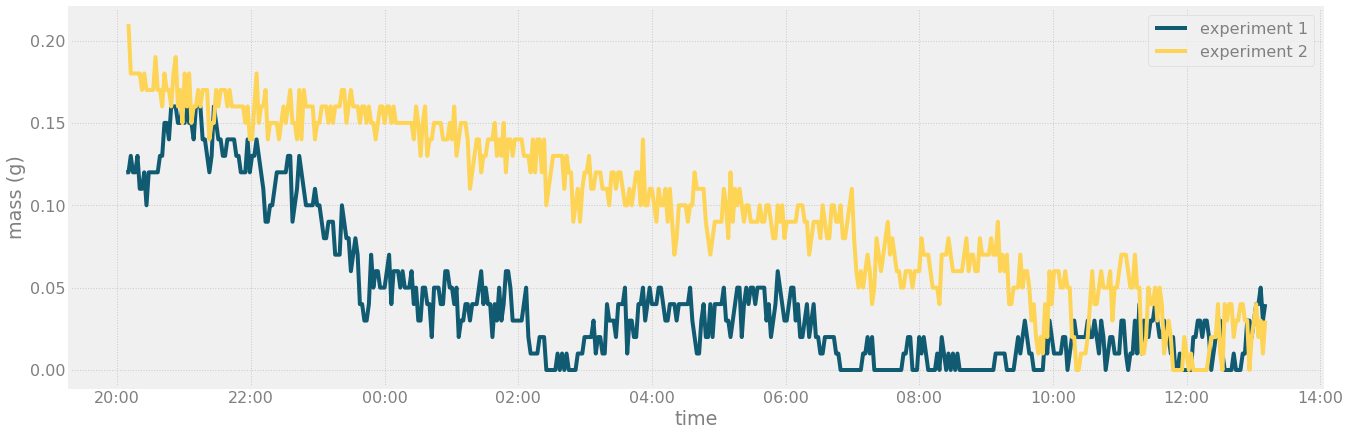

In [0]:

fig, ax = newfigure()

xformatter = mdates.DateFormatter('%H:%M')

t= [df1, df2]
c = ['#115b72','#fed456']
for i in range(len(t)):
    fig.axes[0].plot(t[i]['mass'], color = c[i])
    plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
    ax.set_xlabel("time")
            
  
for a in fig.axes:
    a.set_ylabel("mass (g)")
    a.legend()

mylabels = ['experiment 1', 'experiment 2']
ax.legend(labels=mylabels)
plt.rcParams.update({'font.size': 16}) 
plt.rcParams.update({'text.color' : "grey",
                     'axes.labelcolor' : "grey",
                     'xtick.color': "grey",
                    'ytick.color': "grey"})
plt.rcParams["figure.figsize"] = [20, 7]    
#ax[0].plot(hp_trend1, label = 'hodricks prescott filter', color=c[3])
#ax[1].plot(hp_trend2, label = 'hodricks prescott filter', color=c[3]) 
#ax[0].legend() 
#ax[1].legend() 


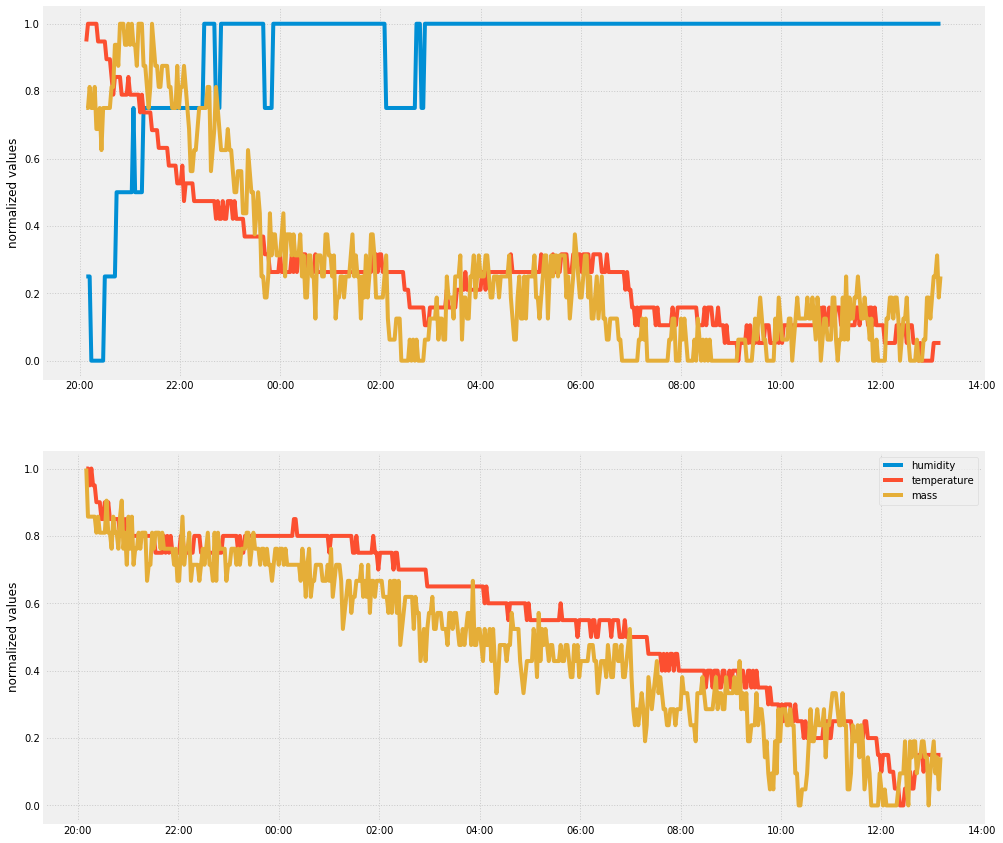

In [0]:
fig, ax = newfigure(nrows =2, ncols=1)

xformatter = mdates.DateFormatter('%H:%M')

t= [normalised_df1, normalised_df2]

for i in range(len(t)):
    for name in t[i].columns:
        fig.axes[i].plot(t[i][name])
        plt.gcf().axes[i].xaxis.set_major_formatter(xformatter)
            
plt.legend()  
for a in fig.axes:
    a.set_ylabel("normalized values")

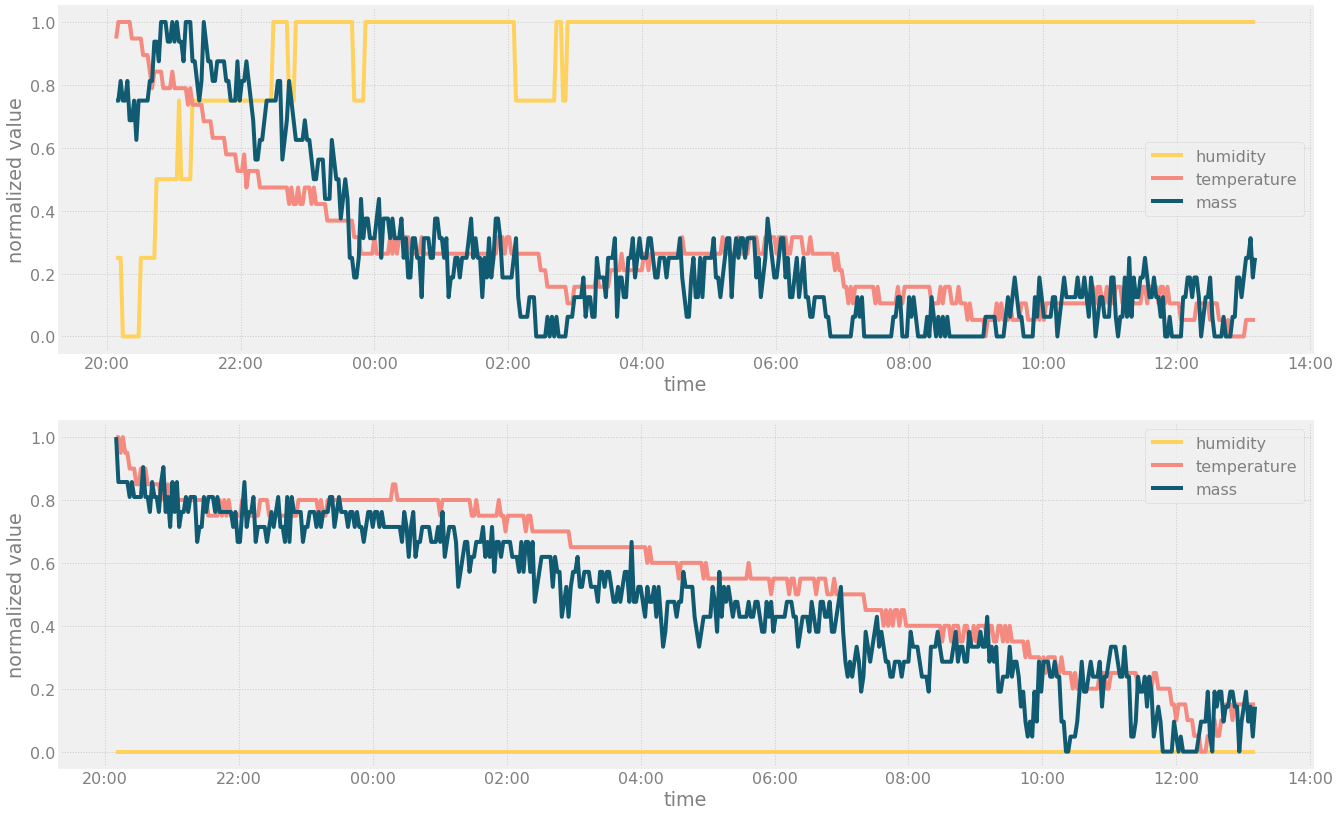

In [0]:
fig, ax = newfigure(nrows =2, ncols=1)

xformatter = mdates.DateFormatter('%H:%M')

t= [normalised_df1, normalised_df2]
c = ['#FFD25E', '#F58A80','#115b72','#fed456']

for i in range(len(t)):
    for name in t[i].columns:
        fig.axes[i].plot(t[i][name], color = c[t[i].columns.get_loc(name)])
        plt.gcf().axes[i].xaxis.set_major_formatter(xformatter)
        ax[i].set_xlabel("time")
            
  
for a in fig.axes:
    a.set_ylabel("normalized value")
    a.legend()
    plt.rcParams["figure.figsize"] = [20, 14]
    
plt.rcParams.update({'font.size': 16}) 
plt.rcParams.update({'text.color' : "grey",
                     'axes.labelcolor' : "grey",
                     'xtick.color': "grey",
                    'ytick.color': "grey"})

This data set shows there is a corrolation between the temperature & mass - however the mass increases before the temperature. Showing no causality between the mass increasing & temperature increasing.

This could be due to a lag in the temperature sensor - meaning the weight is changing based on a temparature increase - leading to the coefficient of the scale changing.

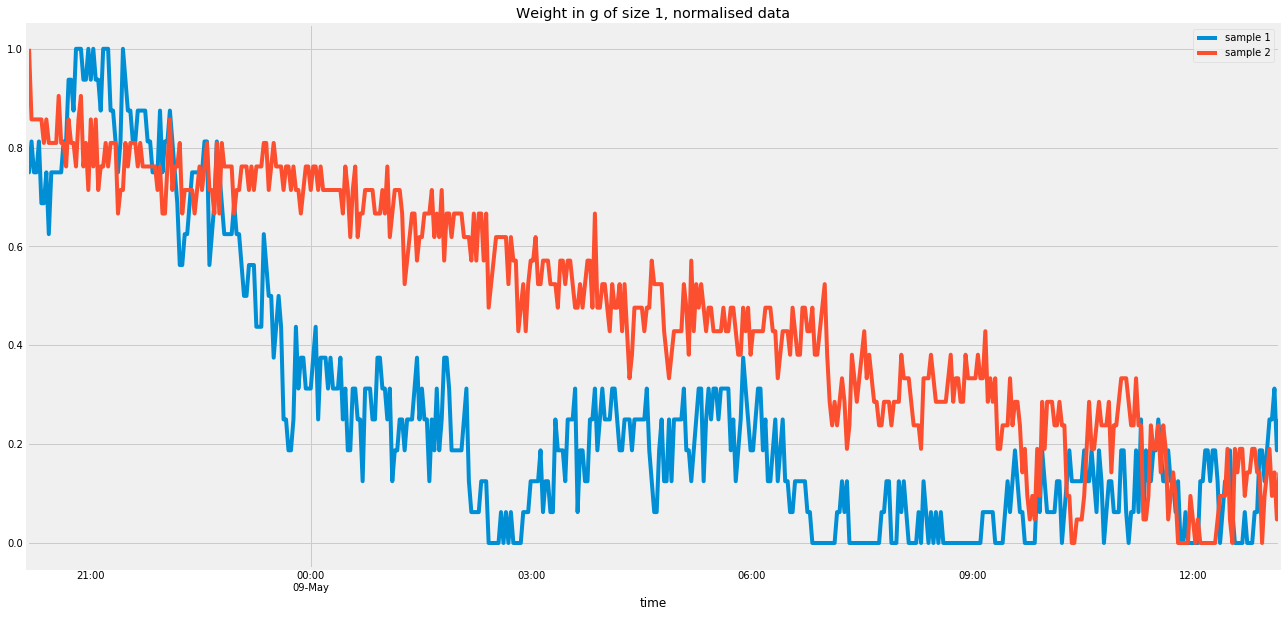

In [0]:
plt.figure(figsize=(20, 10))
normalised_df1["mass"].plot(label = "sample 1")
normalised_df2["mass"].plot(label ="sample 2") 
plt.title("Weight in g of size 1, normalised data")
plt.legend()
plt.show()

In [0]:
from scipy.stats import pearsonr

print(df1.corr(method ='pearson'))


t = pearsonr(df1['mass'], df1['temperature'])
t = pearsonr(df1['mass'], df1['humidity'])
print(t)

             humidity  temperature      mass
humidity     1.000000    -0.821396 -0.643442
temperature -0.821396     1.000000  0.887062
mass        -0.643442     0.887062  1.000000
(-0.6434418911410026, 1.034572228888977e-60)


In [0]:
print(df2.corr(method ='pearson'))

print(pearsonr(df2['mass'], df2['temperature']))
t = pearsonr(df2['mass'], df2['humidity'])
print(t)

             humidity  temperature      mass
humidity          NaN          NaN       NaN
temperature       NaN     1.000000  0.945045
mass              NaN     0.945045  1.000000
(0.9450454260593393, 2.4002510110061702e-247)
(nan, nan)
